In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import folium
from folium import features
from folium.plugins import FloatImage
from folium.plugins import MarkerClusterfrom folium import features
from jinja2 import Template
from sklearn.cluster import KMeans
from branca.colormap import LinearColormap
from branca.element import Element
import random

In [2]:
# Specify your path
path = "C:\\Users\\chimi\\Desktop\\Python Data Science Projects\\Cocoa Production\\Farmers Survey\\soil_survey.csv"

In [3]:
soil_survey = pd.read_csv(path)

In [4]:
soil_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ObsFarm#    739 non-null    int64  
 1   FID0        739 non-null    int64  
 2   Xf          739 non-null    float64
 3   Yf          739 non-null    float64
 4   Ecology     739 non-null    object 
 5   Xd          739 non-null    float64
 6   Yd          739 non-null    float64
 7   DistName    739 non-null    object 
 8   DistID      739 non-null    object 
 9   Region      739 non-null    object 
 10  REGION      739 non-null    object 
 11  DistKey     739 non-null    object 
 12  District    739 non-null    object 
 13  pH          739 non-null    float64
 14  SOC         739 non-null    float64
 15  Fe_meq100g  739 non-null    float64
 16  Al_meq100g  739 non-null    float64
 17  Clay        739 non-null    float64
dtypes: float64(9), int64(2), object(7)
memory usage: 104.0+ KB


In [5]:
soil_survey.columns

Index(['ObsFarm#', 'FID0', 'Xf', 'Yf', 'Ecology', 'Xd', 'Yd', 'DistName',
       'DistID', 'Region', 'REGION', 'DistKey', 'District', 'pH', 'SOC',
       'Fe_meq100g', 'Al_meq100g', 'Clay'],
      dtype='object')

In [6]:
soil_survey.dtypes

ObsFarm#        int64
FID0            int64
Xf            float64
Yf            float64
Ecology        object
Xd            float64
Yd            float64
DistName       object
DistID         object
Region         object
REGION         object
DistKey        object
District       object
pH            float64
SOC           float64
Fe_meq100g    float64
Al_meq100g    float64
Clay          float64
dtype: object

In [7]:
soil_survey.head(5)

,ObsFarm#,FID0,Xf,Yf,Ecology,Xd,Yd,DistName,DistID,Region,REGION,DistKey,District,pH,SOC,Fe_meq100g,Al_meq100g,Clay
0,1,1202,-2.309,6.972,MSNW,-2.411475,6.864890,Dadiesoba,BA2,Brong Ahafo,BA,DADIESOABA,Dadiesoaba,6.61,0.617,0.023,1.69,34.76
1,2,1584,-2.230,6.319,ME,-2.248520,6.315544,Bibiani,WN6,Western North,WN,BIBIANI,Bibiani,5.54,0.173,0.023,3.01,12.76
2,3,1338,-0.222,6.201,DSIZ,-0.116434,6.222063,Oyoko,ER9,Eastern,ER,OYOKO,Oyoko,6.19,0.112,0.024,9.80,24.76
3,4,1410,-0.711,5.717,MSSE,-0.742504,5.820004,Asamankese,ER1,Eastern,ER,ASAMANKESE,Asamankese,5.14,0.097,0.027,12.30,18.76
4,5,1346,-0.537,6.088,MSSE,-0.435992,6.297231,Tafo,ER8,Eastern,ER,TAFO,Kibi/Tafo,6.99,0.318,0.030,13.23,18.76


In [8]:
soil_survey.isnull().sum()

ObsFarm#      0
FID0          0
Xf            0
Yf            0
Ecology       0
Xd            0
Yd            0
DistName      0
DistID        0
Region        0
REGION        0
DistKey       0
District      0
pH            0
SOC           0
Fe_meq100g    0
Al_meq100g    0
Clay          0
dtype: int64

In [9]:
soil_survey.duplicated().sum()

0

In [10]:
soil_survey.describe()

,ObsFarm#,FID0,Xf,Yf,Xd,Yd,pH,SOC,Fe_meq100g,Al_meq100g,Clay
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,370.000000,1374.051421,-1.481158,6.308974,-1.480978,6.319798,5.345196,0.393032,0.087210,7.661123,21.395129
std,213.475213,219.283299,1.029388,0.685166,0.999484,0.707345,0.744218,0.234632,0.036349,4.880400,8.738376
min,1.000000,1001.000000,-3.216000,4.830000,-3.126563,4.978875,3.450000,0.000000,0.023000,0.190000,2.760000
25%,185.500000,1185.500000,-2.346500,5.789000,-2.357721,5.786314,4.815000,0.227000,0.059000,4.150000,14.760000
50%,370.000000,1370.000000,-1.518000,6.257000,-1.438687,6.297231,5.400000,0.339000,0.081000,6.790000,20.760000
75%,554.500000,1556.500000,-0.781500,6.834500,-0.742504,6.783842,5.900000,0.495000,0.109000,9.895000,26.760000
max,739.000000,1762.000000,0.616000,8.256000,0.378028,7.944588,7.430000,2.586000,0.200000,37.370000,54.760000


In [11]:
soil_survey['Ecology'].value_counts()

MSSE    298
ME      182
MSNW    103
DSIZ     75
WE       56
DSFZ     25
Name: Ecology, dtype: int64

In [12]:
soil_survey['District'].value_counts()

Hohoe           35
Papase          25
Mampong         23
Nyarkrom        23
Oyoko           18
                ..
New Abirem       7
Daboase          6
Mankranso        5
Sefwi Bekwai     4
Boako            4
Name: District, Length: 61, dtype: int64

In [13]:
soil_survey

,ObsFarm#,FID0,Xf,Yf,Ecology,Xd,Yd,DistName,DistID,Region,REGION,DistKey,District,pH,SOC,Fe_meq100g,Al_meq100g,Clay
0,1,1202,-2.309,6.972,MSNW,-2.411475,6.864890,Dadiesoba,BA2,Brong Ahafo,BA,DADIESOABA,Dadiesoaba,6.61,0.617,0.023,1.69,34.76
1,2,1584,-2.230,6.319,ME,-2.248520,6.315544,Bibiani,WN6,Western North,WN,BIBIANI,Bibiani,5.54,0.173,0.023,3.01,12.76
2,3,1338,-0.222,6.201,DSIZ,-0.116434,6.222063,Oyoko,ER9,Eastern,ER,OYOKO,Oyoko,6.19,0.112,0.024,9.80,24.76
3,4,1410,-0.711,5.717,MSSE,-0.742504,5.820004,Asamankese,ER1,Eastern,ER,ASAMANKESE,Asamankese,5.14,0.097,0.027,12.30,18.76
4,5,1346,-0.537,6.088,MSSE,-0.435992,6.297231,Tafo,ER8,Eastern,ER,TAFO,Kibi/Tafo,6.99,0.318,0.030,13.23,18.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,735,1221,-2.062,6.112,ME,-2.051411,6.085170,Diaso,CR7,Central,CR,DIASO,Diaso,5.02,0.485,0.189,8.98,20.76
735,736,1229,-2.104,6.091,ME,-2.051411,6.085170,Diaso,CR7,Central,CR,DIASO,Diaso,5.09,0.535,0.191,8.00,38.76
736,737,1685,-2.069,5.772,ME,-2.001717,5.776301,Wassa Akr.,WS9,Western South,WS,WASSA AKROPONG,Wasa akropong,5.03,0.403,0.194,5.96,30.76
737,738,1233,-2.124,6.161,ME,-2.051411,6.085170,Diaso,CR7,Central,CR,DIASO,Diaso,5.43,0.438,0.195,8.12,28.76


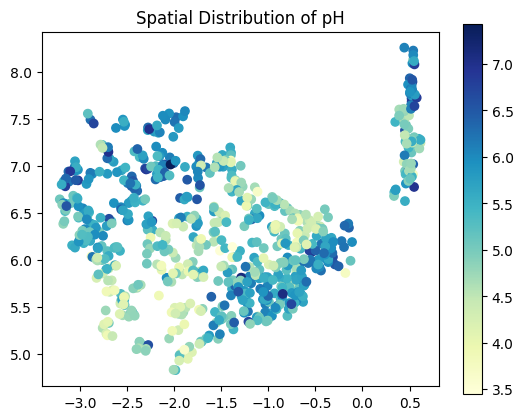

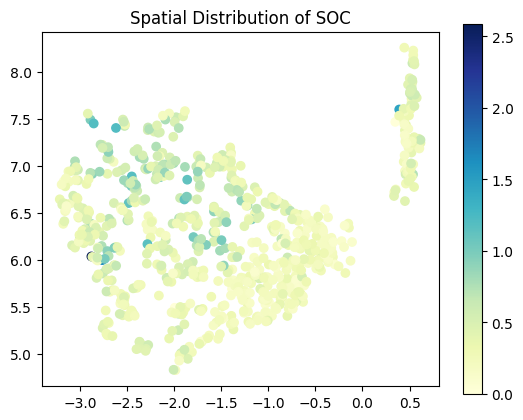

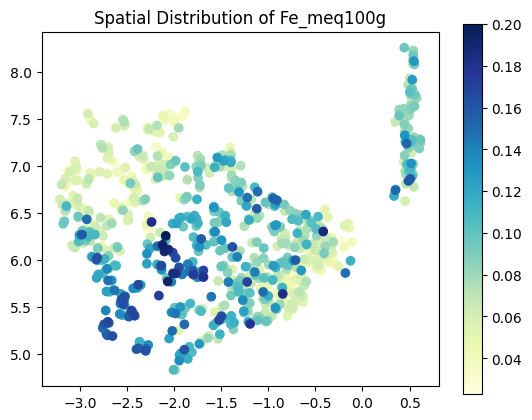

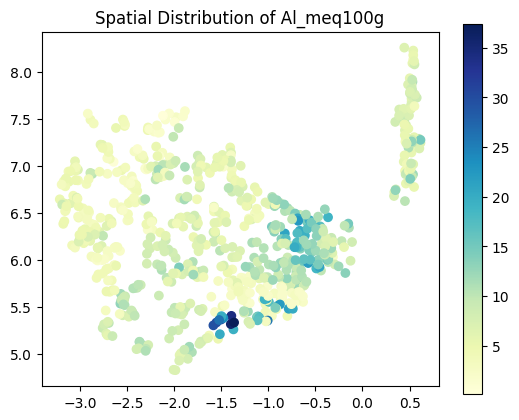

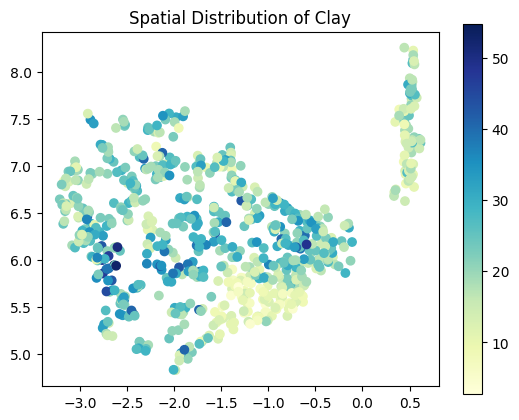

In [63]:
# What is the spatial distribution of each soil variable (pH, SOC, Fe_meq100g, Al_meq100g, Clay)?
#Most farms exhibit a pH value above 4.5, SOC values predominantly ranging from 0.0 to 0.5, Iron concentrations typically above 0.6, 
# AL_meq100g primarily below 10, and Clay values generally over 10.


gdf = gpd.GeoDataFrame(soil_survey, geometry=gpd.points_from_xy(soil_survey.Xf, soil_survey.Yf))

# List of variables to plot
variables = ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']  

# Define the color map
color_map = 'YlGnBu'

# Loop over variables and create a plot for each one
for var in variables:
    fig, ax = plt.subplots(1, 1)
    gdf.plot(column=var, ax=ax, legend=True, cmap=color_map)
    plt.title('Spatial Distribution of ' + var)
    plt.show()




In [14]:
# Interactive Geospatial Cocoa map
# Map -showcases soil survey data for cocoa farms in Ghana, providing insights into various attributes,such pH levels,
# soil organic(SOC), iron content, aluminum content, clay % and ecological zones.
# Marker represent cocoa farm and color coded based one ecological zone.

# Create a Folium map
map_ghana = folium.Map(location=[7.9465, -1.0232], zoom_start=7, tiles='CartoDB Positron')

# Define marker colors for each ecological zone
zone_colors = {
    'MSSE': '#00008B',     # Dark blue
    'ME': '#006400',       # Dark green
    'MSNW': '#8B0000',     # Dark red
    'DSIZ': '#800080',     # Dark purple
    'WE': '#FF8C00',       # Dark orange
    'DSFZ': '#FFFF00'      # Yellow
}

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(map_ghana)

# Iterate over the soil_survey DataFrame
for index, row in soil_survey.iterrows():
    lat = row['Yf']
    lon = row['Xf']
    farm_id = row['ObsFarm#']
    district = row['DistName']
    region = row['Region']
    ph = row['pH']
    soc = row['SOC']
    fe_meq100g = row['Fe_meq100g']
    al_meq100g = row['Al_meq100g']
    clay = row['Clay']
    ecological_zone = row['Ecology']

    # Determine the marker color based on the ecological zone
    marker_color = zone_colors.get(ecological_zone, 'gray')

    popup_text = f"""
    <strong>Cocoa Farm ID:</strong> {farm_id}<br>
    <strong>District:</strong> {district}<br>
    <strong>Region:</strong> {region}<br>
    <strong>pH:</strong> {ph}<br>
    <strong>SOC:</strong> {soc}<br>
    <strong>Fe_meq100g:</strong> {fe_meq100g}<br>
    <strong>Al_meq100g:</strong> {al_meq100g}<br>
    <strong>Clay:</strong> {clay}<br>
    <strong>Ecological Zone:</strong> {ecological_zone}<br>
    """

    # Create a FontAwesome marker
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color=marker_color, icon='circle'),
        popup=popup_text
    ).add_to(marker_cluster)

# Add the colormap legend to the map
legend_html = '''
<div style="position: fixed; 
            top: 50px; right: 10px; width: auto; height: auto; 
            border: 2px solid grey; z-index: 9999; font-size: 14px;
            background-color: white;">
    <p><strong>Ecological Zones</strong></p>
    {% for zone, color in legend_items.items() %}
    <p><span style="color:{{ color }};">{{ zone }}</span></p>
    {% endfor %}
</div>
'''

# Render the HTML template with the legend items
legend_html_rendered = Template(legend_html).render(legend_items=zone_colors)

# Create a folium.Element with the rendered legend HTML
legend = folium.Element(legend_html_rendered)

# Add the legend to the map
map_ghana.get_root().html.add_child(legend)

# Display the map
map_ghana


C:\Users\chimi\AppData\Local\Temp\ipykernel_23136\798977471.py:54: UserWarning: color argument of Icon should be one of: {'lightgreen', 'gray', 'black', 'darkgreen', 'darkpurple', 'lightgray', 'darkblue', 'beige', 'red', 'green', 'blue', 'lightred', 'darkred', 'cadetblue', 'pink', 'white', 'orange', 'lightblue', 'purple'}.
  icon=folium.Icon(color=marker_color, icon='circle'),


In [65]:
# Where are most of the cocoa farms located? 
# Eastern, Central, Ashanti are regions where most of the cocoa farms are located.

# Extract the latitude and longitude coordinates

coordinates = soil_survey[['Yf', 'Xf']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(coordinates)

# Add the cluster labels to the DataFrame
soil_survey['Cluster'] = clusters

# Count the occurrences of each region within each cluster
region_counts = soil_survey.groupby(['Cluster', 'Region']).size().reset_index(name='Count')

# Find the dominant region within each cluster
dominant_regions = region_counts.groupby('Cluster').apply(lambda x: x['Region'].iloc[x['Count'].argmax()])

# Create a Folium Map object
map_clusters = folium.Map(location=[7.9465, -1.0232], zoom_start=7)

# Define bright colors for the clusters
cluster_colors = ['#FFD700', '#00FF7F', '#FF4500', '#DA70D6', '#FFA500']

# Add data points with cluster colors and region labels to the map
for _, row in soil_survey.iterrows():
    cluster = row['Cluster']
    region = row['Region']
    count = region_counts[(region_counts['Cluster'] == cluster) & (region_counts['Region'] == region)]['Count'].values[0]
    
    folium.CircleMarker(
        location=[row['Yf'], row['Xf']],
        radius=5,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=0.7,
        popup=f"Region: {region}<br>Cluster: {cluster}<br>Count: {count}"
    ).add_to(map_clusters)

# Display the map
map_clusters


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [16]:
# Read the region geospatial data into a geopandas GeoDataFrame
region_geodata = gpd.read_file('C:/Users/chimi/Desktop/Python Data Science Projects/Cocoa Production/Ghana Geo Data/gadm36_GHA_1.shp')
region_geodata.head(5)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,GHA,Ghana,GHA.1_1,Ashanti,NaN,NaN,Region,Region,NaN,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ..."
1,GHA,Ghana,GHA.2_1,Brong Ahafo,NaN,NaN,Region,Region,NaN,GH.BA,"POLYGON ((-1.32043 7.59765, -1.33175 7.60270, ..."
2,GHA,Ghana,GHA.3_1,Central,NaN,NaN,Region,Region,NaN,GH.CP,"MULTIPOLYGON (((-0.65097 5.32708, -0.65208 5.3..."
3,GHA,Ghana,GHA.4_1,Eastern,NaN,NaN,Region,Region,NaN,GH.EP,"POLYGON ((-0.15026 5.76965, -0.16500 5.76512, ..."
4,GHA,Ghana,GHA.5_1,Greater Accra,NaN,NaN,Region,Region,NaN,GH.AA,"MULTIPOLYGON (((0.68486 5.78069, 0.68486 5.780..."


In [17]:
region_geodata.rename(columns={'NAME_1':'Region'},inplace=True)

In [18]:
region_geodata.drop(columns=['VARNAME_1','NL_NAME_1','TYPE_1','ENGTYPE_1','CC_1'],inplace=True)

In [19]:
region_geodata.head(5)

,GID_0,NAME_0,GID_1,Region,HASC_1,geometry
0,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ..."
1,GHA,Ghana,GHA.2_1,Brong Ahafo,GH.BA,"POLYGON ((-1.32043 7.59765, -1.33175 7.60270, ..."
2,GHA,Ghana,GHA.3_1,Central,GH.CP,"MULTIPOLYGON (((-0.65097 5.32708, -0.65208 5.3..."
3,GHA,Ghana,GHA.4_1,Eastern,GH.EP,"POLYGON ((-0.15026 5.76965, -0.16500 5.76512, ..."
4,GHA,Ghana,GHA.5_1,Greater Accra,GH.AA,"MULTIPOLYGON (((0.68486 5.78069, 0.68486 5.780..."


In [20]:
# Merge region geospatial data with the summarized soil attribute data
merged_data = region_geodata.merge(soil_survey, on='Region')

In [21]:
merged_data['Region'].value_counts()

Eastern        147
Ashanti        123
Central        120
Brong Ahafo     81
Volta           77
Name: Region, dtype: int64

In [50]:
# Ghana Regional Soil Profile

# Read the GeoJson file containing the boundaries
shape_filepath = 'C:/Users/chimi/Desktop/Python Data Science Projects/Cocoa Production/Ghana Geo Data/gadm36_GHA_1.shp'
geo_data = gpd.read_file(shape_filepath)

In [51]:
geo_data.head(5)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,GHA,Ghana,GHA.1_1,Ashanti,NaN,NaN,Region,Region,NaN,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ..."
1,GHA,Ghana,GHA.2_1,Brong Ahafo,NaN,NaN,Region,Region,NaN,GH.BA,"POLYGON ((-1.32043 7.59765, -1.33175 7.60270, ..."
2,GHA,Ghana,GHA.3_1,Central,NaN,NaN,Region,Region,NaN,GH.CP,"MULTIPOLYGON (((-0.65097 5.32708, -0.65208 5.3..."
3,GHA,Ghana,GHA.4_1,Eastern,NaN,NaN,Region,Region,NaN,GH.EP,"POLYGON ((-0.15026 5.76965, -0.16500 5.76512, ..."
4,GHA,Ghana,GHA.5_1,Greater Accra,NaN,NaN,Region,Region,NaN,GH.AA,"MULTIPOLYGON (((0.68486 5.78069, 0.68486 5.780..."


In [52]:
geo_data.rename(columns={'NAME_1':'Region'},inplace=True)

In [53]:
geo_data.drop(columns=['VARNAME_1','NL_NAME_1','TYPE_1','ENGTYPE_1','CC_1'],inplace=True)

In [54]:
# Convert the GeoDataFrame to GeoJSON format
geo_data = geo_data.to_crs('EPSG:4326') # Convert the WGS84 coordinates
geojson_data = geo_data.to_json()

In [55]:
# Merge the GeoJSON data with the soil_survey data based on a common key
merged_data = geo_data.merge(soil_survey, left_on='Region', right_on='Region', how='left')

In [56]:
merged_data

,GID_0,NAME_0,GID_1,Region,HASC_1,geometry,ObsFarm#,FID0,Xf,Yf,...,DistID,REGION,DistKey,District,pH,SOC,Fe_meq100g,Al_meq100g,Clay,Cluster
0,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ...",46.0,1006.0,-2.150,6.880,...,AR9,AR,TEPA,Tepa,6.36,0.995,0.042,6.62,24.76,3.0
1,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ...",57.0,1041.0,-1.405,7.196,...,AR11,AR,MAMPONG,Mampong,5.60,0.341,0.044,5.40,24.76,3.0
2,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ...",96.0,1022.0,-1.938,6.659,...,AR6,AR,NKAWIE,Nkawie,6.44,0.594,0.049,7.36,30.76,3.0
3,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ...",117.0,1014.0,-2.006,7.029,...,AR7,AR,MANKRANSO,Mankranso,6.33,0.803,0.052,8.78,24.76,3.0
4,GHA,Ghana,GHA.1_1,Ashanti,GH.AH,"POLYGON ((-1.54145 5.93492, -1.55517 5.91302, ...",158.0,1088.0,-1.143,6.495,...,AR8,AR,JUASO,Juaso,5.65,0.293,0.057,3.25,12.76,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,GHA,Ghana,GHA.9_1,Volta,GH.TV,"MULTIPOLYGON (((0.90236 5.91292, 0.90236 5.912...",684.0,1491.0,0.469,7.236,...,VR1,VR,KPEVE/HOHOE,Hohoe,4.66,0.147,0.152,7.26,14.76,4.0
549,GHA,Ghana,GHA.9_1,Volta,GH.TV,"MULTIPOLYGON (((0.90236 5.91292, 0.90236 5.912...",685.0,1504.0,0.350,6.742,...,VR1,VR,KPEVE/HOHOE,Hohoe,5.76,0.447,0.152,12.96,18.76,4.0
550,GHA,Ghana,GHA.9_1,Volta,GH.TV,"MULTIPOLYGON (((0.90236 5.91292, 0.90236 5.912...",699.0,1474.0,0.488,6.840,...,VR1,VR,KPEVE/HOHOE,Hohoe,4.89,0.374,0.158,6.72,16.76,4.0
551,GHA,Ghana,GHA.9_1,Volta,GH.TV,"MULTIPOLYGON (((0.90236 5.91292, 0.90236 5.912...",701.0,1473.0,0.507,6.862,...,VR1,VR,KPEVE/HOHOE,Hohoe,5.14,0.367,0.159,14.00,14.76,4.0


In [59]:
# What does the soil profile looks like across regions?

# Create a Folium Map object
map_heat = folium.Map(location=[7.9465, -1.0232], zoom_start=7, tiles='CartoDB Positron')

# Define the regional information for each variable
variable_info = {
    'pH': 'pH information',
    'SOC': 'SOC information',
    'Fe_meq100g': 'Iron information',
    'Al_meq100g': 'Aluminum information',
    'Clay': 'Clay information'
}

# Iterate through the variables
variables = ['pH', 'SOC', 'Fe_meq100g', 'Al_meq100g', 'Clay']
for variable in variables:
    # Create a Folium Choropleth layer for each variable
    choropleth = folium.Choropleth(
        geo_data=merged_data,
        data=merged_data,
        columns=['Region', variable],
        key_on='feature.properties.Region',
        fill_color='YlOrBr',  # Use a brighter color palette, e.g., 'YlOrBr'
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=variable,
    ).add_to(map_heat)

    # Add a GeoJsonTooltip for the region names
    choropleth.geojson.add_child(
        features.GeoJsonTooltip(['Region'], labels=True)
    )

# Adjust the position of the zoom buttons using CSS
css = '''
.leaflet-top.leaflet-right {
    margin-top: 100px !important;
}
'''
folium.Marker(location=[0, 0], icon=folium.Icon()).add_to(map_heat)  # Add a dummy marker to create space for the legend button
map_heat.get_root().header.add_child(folium.Element(f'<style>{css}</style>'))

# Adjust the position of the legend
map_heat.add_child(choropleth)

# Save the map to an HTML file
map_heat.save('C:/Users/chimi/Desktop/Python Data Science Projects/Cocoa Production/EDA/map.html')

In [78]:
merged_data.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'Region', 'HASC_1', 'geometry', 'ObsFarm#',
       'FID0', 'Xf', 'Yf', 'Ecology', 'Xd', 'Yd', 'DistName', 'DistID',
       'REGION', 'DistKey', 'District', 'pH', 'SOC', 'Fe_meq100g',
       'Al_meq100g', 'Clay', 'Cluster'],
      dtype='object')